# Gerardo de Miguel González

# Feature Selection Proof of Concept

## References

**::GMG::** I've followed this reference:

  - [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/) Introduction to Feature Selection methods with an example (or how to select the right variables?). Saurav Kaushik, december 1, 2016.

## Libraries

In [1]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    if(length(need)>0){ 
        install.packages(need)
        lapply(need,require,character.only=TRUE)
    }
}

In [2]:
#::GMG::Now, the libraries I need (possibly)
using('mlbench', 'caTools', 'corrplot')

Loading required package: mlbench
Loading required package: caTools
Loading required package: corrplot
corrplot 0.84 loaded


## Dataset

### load

In [3]:
#::GMG::The reference use a Google drive stored dataset
#::QUOTE::We’ll be using stock prediction data in which we’ll predict whether the stock will go up or down 
#         based on 100 predictors in R. This dataset contains 100 independent variables from X1 to X100 
#         representing profile of a stock and one outcome variable Y with two levels : 1 for rise in stock 
#         price and -1 for drop in stock price.
#::NOTE::The file is in Google Drive so it's difficult to download it from R
#        URL = https://drive.google.com/file/d/0ByPBn4rtMQ5HaVFITnBObXdtVUU/view
# https://stackoverflow.com/questions/33135060/read-csv-file-hosted-on-google-drive
id <- "0ByPBn4rtMQ5HaVFITnBObXdtVUU" # google file ID
stock <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

In [4]:
head(stock)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X92,X93,X94,X95,X96,X97,X98,X99,X100,Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
100.00000,100.00000,100.0000,100.00000,100.00000,100.00000,100.0000,100.00000,100.00000,100.00000,⋯,100.00000,100.00000,100.00000,100.0000,100.00000,100.00000,100.00000,100.00000,100.00000,1
91.56786,96.62190,98.0846,96.54391,91.67888,96.33792,96.1250,94.01596,94.40920,97.08418,⋯,96.88889,95.49902,97.45797,99.2823,101.29670,98.31068,100.48913,99.60223,93.26316,-1
92.90860,97.64075,103.1124,98.13031,78.04196,97.69384,95.6250,95.74468,94.08971,96.65523,⋯,97.33333,96.37980,93.39722,100.4785,101.17995,98.14162,96.08484,99.20447,86.42105,1
84.86918,94.36989,109.0182,102.20963,73.35720,100.67688,96.9166,93.08511,98.24307,98.11334,⋯,101.92593,95.98841,94.41241,100.9569,99.28702,102.02702,100.32626,103.98531,77.51318,1
88.88889,95.60322,108.4597,103.11615,77.83273,104.67740,100.8750,93.61702,100.00000,99.82854,⋯,102.07407,102.15264,105.57947,106.9378,101.65110,103.88499,106.68814,108.52520,85.73684,1
87.32553,96.30019,106.9432,102.71955,77.41315,102.16948,100.7500,94.94681,97.12460,98.11334,⋯,98.51852,104.10959,117.76172,105.7416,100.47115,107.76999,101.95758,107.88648,91.80261,-1


In [5]:
dim(stock)

[1] 3000  101

In [6]:
#::GMG::I use mlbench to get the pima indians diabetes dataset
#       that is my dataset
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
data(PimaIndiansDiabetes)

In [7]:
head(PimaIndiansDiabetes)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [8]:
dim(PimaIndiansDiabetes)

[1] 768   9

### exploratory data analysis

In [9]:
#::GMG::Here I can see the variables (datasets and functions in memory)
ls()

[1] "id"                  "PimaIndiansDiabetes" "stock"              
[4] "using"

In [10]:
#::GMG::I do some factor feature addition in stock based on Y
#       Y {1, -1} -> factor w/ 2 levels 'bull', 'bear', i.e up and down ;)
#::NOTE::Useless, I comment it out
#stock$market <- as.factor(stock$Y)
#levels(stock$market) <- c('bull', 'bear')
#str(stock$market)

In [11]:
#::GMG::100 features (view last 21) + Y (binary level factor)
str(stock[,80:101])

'data.frame':	3000 obs. of  22 variables:
 $ X80 : num  100 102 105 106 106 ...
 $ X81 : num  100 99.1 98.5 100.1 103 ...
 $ X82 : num  100 98.7 101.7 106.2 109.6 ...
 $ X83 : num  100 95.7 93.5 89.2 93.7 ...
 $ X84 : num  100 94.1 94.4 101.6 100.3 ...
 $ X85 : num  100 100 101 105 106 ...
 $ X86 : num  100 100 97.2 105.2 103.6 ...
 $ X87 : num  100 104 111 112 115 ...
 $ X88 : num  100 98.9 101.9 104.1 113.7 ...
 $ X89 : num  100 98.2 97.6 97.5 97.6 ...
 $ X90 : num  100 97.2 99.4 110.8 111.3 ...
 $ X91 : num  100 97.3 95.1 97.5 102.5 ...
 $ X92 : num  100 96.9 97.3 101.9 102.1 ...
 $ X93 : num  100 95.5 96.4 96 102.2 ...
 $ X94 : num  100 97.5 93.4 94.4 105.6 ...
 $ X95 : num  100 99.3 100.5 101 106.9 ...
 $ X96 : num  100 101.3 101.2 99.3 101.7 ...
 $ X97 : num  100 98.3 98.1 102 103.9 ...
 $ X98 : num  100 100.5 96.1 100.3 106.7 ...
 $ X99 : num  100 99.6 99.2 104 108.5 ...
 $ X100: num  100 93.3 86.4 77.5 85.7 ...
 $ Y   : int  1 -1 1 1 1 -1 1 1 1 1 ...


In [12]:
str(PimaIndiansDiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [13]:
#::GMG::I know Pima Indians Diabetes has outliers (zeros) in 'glucose', `pressure', 'triceps', 'insulin', 'mass'
#       and I can remove all but two, i.e 'triceps', 'insulin' with low impact in dataset
#::NOTE::'triceps', 'insulin' would need complex imputation I won't try now
apply(X = PimaIndiansDiabetes[c("glucose", "pressure", "triceps", "insulin", "mass")], 
      MARGIN = 2, 
      FUN = function(c) sum(c == 0))

glucose pressure  triceps  insulin     mass 
       5       35      227      374       11

In [14]:
#::GMG::I get the subset of rows to remove with conditional slicing
row_sub <- apply(
             X = PimaIndiansDiabetes[c("glucose", "pressure", "mass")], 
             MARGIN = 1, 
             FUN = function(row) all(row != 0)
)

In [15]:
#::GMG::I transfer the somewhat cleaned dataset to a new dataframe (keep the original)
pima_mod <- PimaIndiansDiabetes[row_sub,]

In [16]:
#::GMG::Now I've got less rows and less outliers too!
str(pima_mod)

'data.frame':	724 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 2 4 10 ...
 $ glucose : num  148 85 183 89 137 116 78 197 110 168 ...
 $ pressure: num  72 66 64 66 40 74 50 70 92 74 ...
 $ triceps : num  35 29 0 23 35 0 32 45 0 0 ...
 $ insulin : num  0 0 0 94 168 0 88 543 0 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 53 30 34 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...


In [17]:
apply(X = pima_mod[c("glucose", "pressure", "triceps", "insulin", "mass")], 
      MARGIN = 2, 
      FUN = function(c) sum(c == 0))

glucose pressure  triceps  insulin     mass 
       0        0      192      332        0

In [18]:
#::GMG::Here I can see again the variables (datasets and functions in memory)
ls()

[1] "id"                  "pima_mod"            "PimaIndiansDiabetes"
[4] "row_sub"             "stock"               "using"

**::GMG::** Now I would perform some correlation analysis among the features and between each feature and the classification variable. I've done that in other notebooks with `corrplot` ([CRAN](https://cran.r-project.org/web/packages/corrplot/index.html), [STHDA](http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software)) (there's another similar package [quoted in Quick R](https://www.statmethods.net/advgraphs/correlograms.html) called `corrgram` ([CRAN](https://cran.r-project.org/web/packages/corrgram/index.html)) I haven't tried). With **100 features** in `stock` ... well, it's not easy to do that, isn't it? At least as a graph. 

In [19]:
#::GMG::Note that 'diabetes' must be numeric to plot the correlation (!)
#       Otherwise it yields Error in cor(pima_mod): 'x' must be numeric
pima_mod$class <- as.numeric(pima_mod$diabetes == 'pos')

In [20]:
#::GMG::Added class column binary 0/1 (neg/pos) nmeric vector from 2 factor diabetes
str(pima_mod)

'data.frame':	724 obs. of  10 variables:
 $ pregnant: num  6 1 8 1 0 5 3 2 4 10 ...
 $ glucose : num  148 85 183 89 137 116 78 197 110 168 ...
 $ pressure: num  72 66 64 66 40 74 50 70 92 74 ...
 $ triceps : num  35 29 0 23 35 0 32 45 0 0 ...
 $ insulin : num  0 0 0 94 168 0 88 543 0 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 53 30 34 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 2 1 2 ...
 $ class   : num  1 0 1 0 1 0 1 1 0 1 ...


In [21]:
#::GMG::There's a clever way of not including the factor in correlation
# https://stackoverflow.com/questions/9805507/deselecting-a-column-by-name
str(pima_mod[,!(colnames(pima_mod) == "diabetes")])

'data.frame':	724 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 2 4 10 ...
 $ glucose : num  148 85 183 89 137 116 78 197 110 168 ...
 $ pressure: num  72 66 64 66 40 74 50 70 92 74 ...
 $ triceps : num  35 29 0 23 35 0 32 45 0 0 ...
 $ insulin : num  0 0 0 94 168 0 88 543 0 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 53 30 34 ...
 $ class   : num  1 0 1 0 1 0 1 1 0 1 ...


In [22]:
#::GMG::For Pima Indians Diabetes there are a bunch of features we can plot in a correlation graph with corrplot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cor.html
# https://www.statmethods.net/stats/correlations.html
#::NOTE::Se also https://www.statmethods.net/advgraphs/correlograms.html
M <- cor(pima_mod[,!(colnames(pima_mod) == "diabetes")])

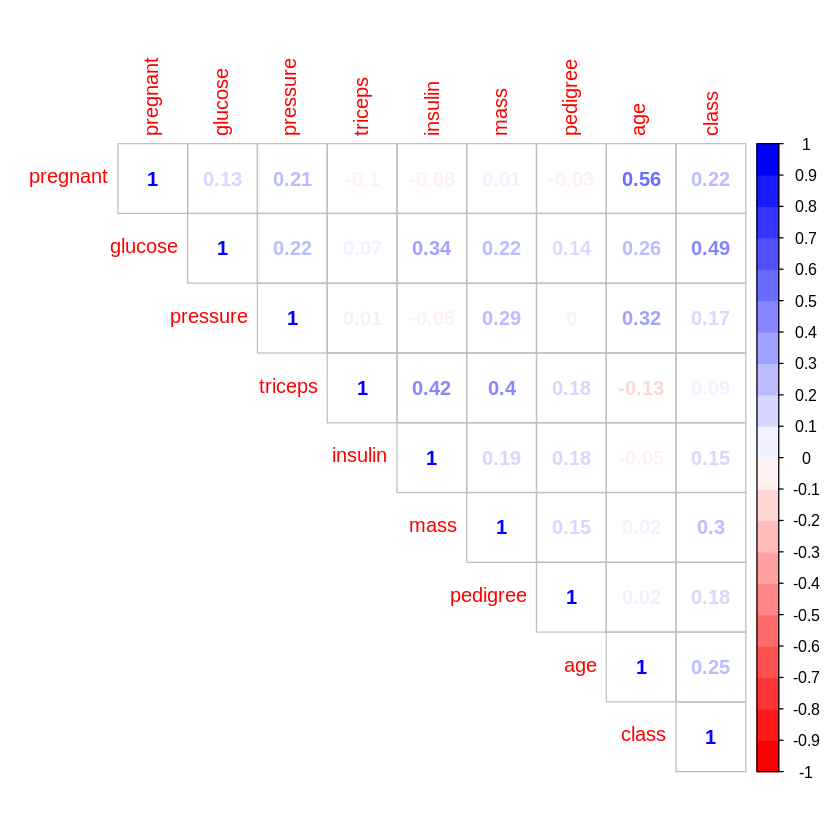

In [23]:
#::GMG::Plpot correlation plot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
col<- colorRampPalette(c("red", "white", "blue"))(20)
corrplot(M, method="number", type="upper", col = col)

**::GMG::** There are *weak* correlations between `insuline` and `triceps`, and `triceps` and `mass` and *stronger* between `glucose` and `diabetes` (`class`) and `pregant` and `age`.  I could devise a *cut-off* value to select some of the features based on their correlation (by default *Pearson*) with class as a measure of *relevance*. Or remove some of them based on *their correlation with other features* (some cut-off here as well) as a measure of *redundancy*.

**::GMG::** We did something similar in `M1966` with the meteo dataset but using the `Spearman` correlation, then chosing a cut-off. There are [some queues](https://www.google.com/search?client=firefox-b-d&q=pearson+versus+spearman+correlations) about the difference berween those correlations.

> The Pearson correlation evaluates the linear relationship between two continuous variables. ... In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. [A comparison of the Pearson and Spearman correlation methods](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

> Should I use Pearson or Spearman correlation? Whereas,when the variables are not normally distributed or the relationship between the variables is not linear it may be more appropriate to use the Spearman rank correlation method. ... The Pearson correlation method measures the strength of the linear relationship between normally distributed variables. (Research Gate) [Which correlation coefficient is better to use: Spearman or Pearson?](https://www.researchgate.net/post/Which_correlation_coefficient_is_better_to_use_Spearman_or_Pearson)

**::NOTE::** This does not work.

In [24]:
#stock$market <- as.numeric(stock$Y == 1)
#str(stock$market)

In [25]:
#str(stock[,80:102])

In [26]:
#stock_z <- as.data.frame(scale(x = stock[,!(colnames(stock) == 'Y')], center = T, scale = T))

In [27]:
#str(stock_z[,80:101])

In [28]:
#::GMG::M1966 like
# https://www.statmethods.net/stats/correlations.html
#::NOTE::With pearson the cut-off must be less tha 0.1 (!!)
#        even if a make Y be 0 and 1 instead of 1 and -1 ...
#        kendall is compute intensive ... several seconds compared to the others
#        and yields same uncorrelation < 0.05 (!!)
# https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient
#
#        scaling does not work the trick ...
#        So I guess it does not work in a classification task
#        Therefor I comment it out ;)
#r_xy <- c()
#for (ivar in 1:(ncol(stock_z) - 1)) {
#  r_xy[ivar] <- cor(stock_z$market, stock_z[, ivar], method = "spearman")
#}

In [29]:
#::GMG::I plot the correlations
#plot(r_xy, 
#     ylim = c(-0.5, 0.5), 
#     pch = 19, cex = 0.5, 
#     xlab = "X_mn predictor", 
#     ylab = "Spearman corr. with Y")
#grid()
#::GMG::and mark in red the selected variables above the cut-off
#ind_sele <- which(abs(r_xy) > 0.4)
#points(ind_sele, r_xy[ind_sele], col = "red", cex = 0.5)

In [30]:
#::GMG::Now I test the imbalance of the datasets
# http://metadatascience.com/2013/07/03/plotting-the-frequency-distribution-using-r/
table(pima_mod$diabetes)


neg pos 
475 249 

In [31]:
prop.table(table(pima_mod$diabetes))


      neg       pos 
0.6560773 0.3439227 

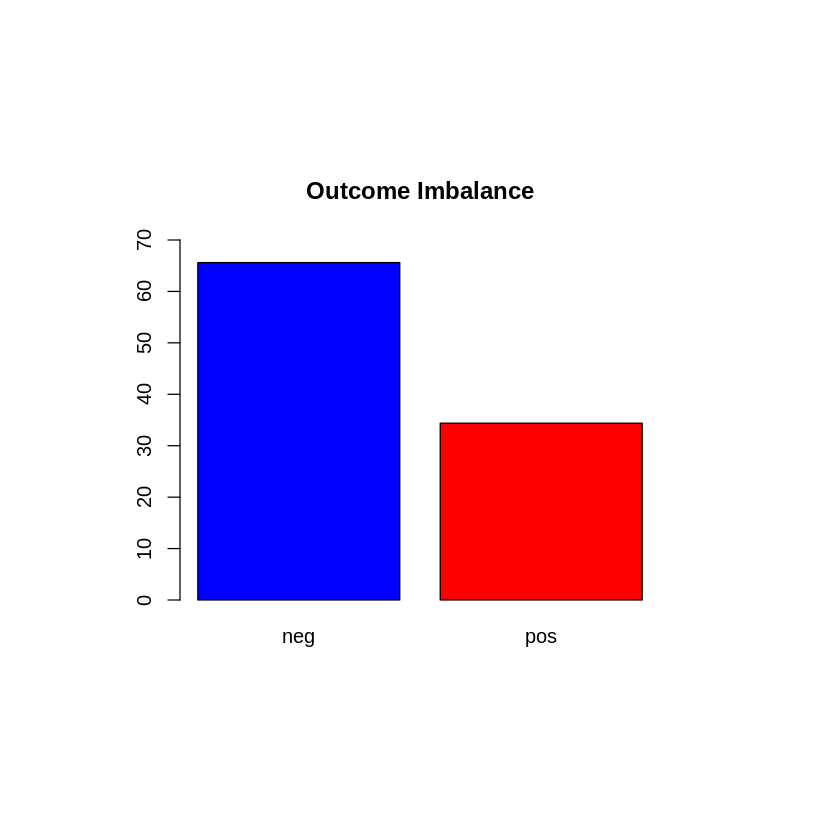

In [32]:
#::GMG::Plot the imbalance
# https://www.statmethods.net/advgraphs/parameters.html
# http://www.programmingr.com/content/positioning-charts-fig-and-fin/
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
par(pin = c(4,3))
barplot(100*prop.table(table(pima_mod$diabetes)), 
        col = c('blue', 'red'),
        ylim = c(0,70),
        main = 'Outcome Imbalance')

In [33]:
#::GMG::Now I test the imbalance of the dataset
# http://metadatascience.com/2013/07/03/plotting-the-frequency-distribution-using-r/
table(stock$Y)


  -1    1 
1508 1492 

In [34]:
prop.table(table(stock$Y))


       -1         1 
0.5026667 0.4973333 

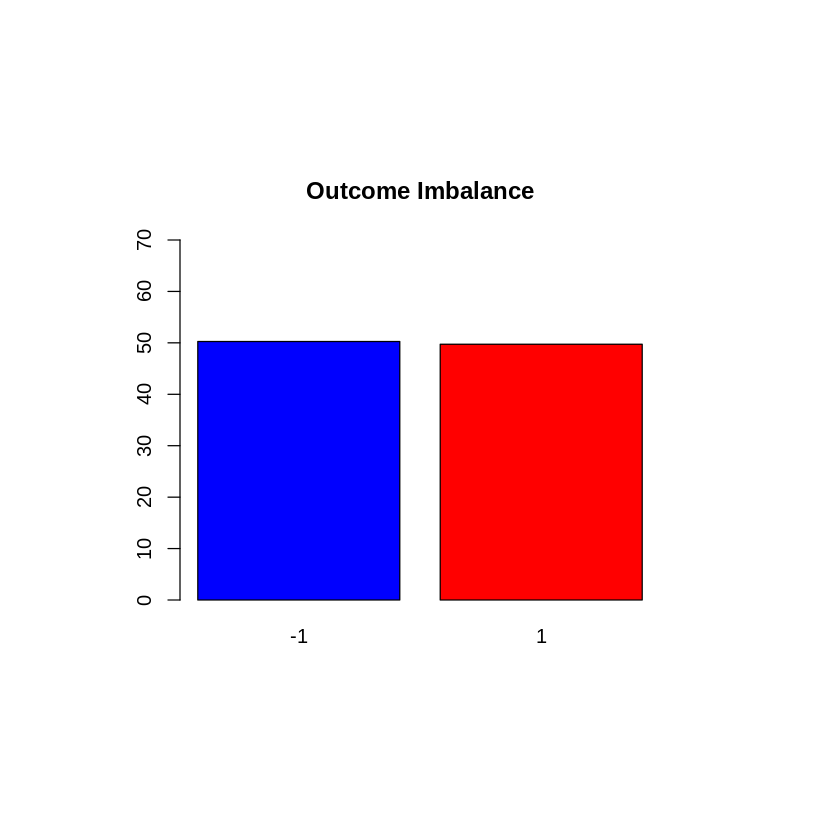

In [35]:
#::GMG::Plot the imbalance
# https://www.statmethods.net/advgraphs/parameters.html
# http://www.programmingr.com/content/positioning-charts-fig-and-fin/
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
par(pin = c(4,3))
barplot(100*prop.table(table(stock$Y)), 
        col = c('blue', 'red'),
        ylim = c(0,70),
        main = 'Outcome Imbalance')

In [36]:
ls()

[1] "col"                 "id"                  "M"                  
[4] "pima_mod"            "PimaIndiansDiabetes" "row_sub"            
[7] "stock"               "using"

## Train/Test Split

In [37]:
#::GMG::Let's make it reproducible
set.seed(1)

In [38]:
#::GMG::I do the customary train/test split BUT stratifiying (?) because of the imbalance
#       to make sure the percentages of healthy/diabetes hold in the train and test sets
#::NOTE::caTools has sample.split( Y, SplitRatio = 2/3, group = NULL )
# https://www.rdocumentation.org/packages/caTools/versions/1.17.1/topics/sample.split
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
# Split data from vector Y into two sets in predefined ratio while preserving relative ratios of 
# differentlabels in Y. Used to split the data used during classification into train and test subsets.
#::NOTE::So it seems this does whay I want it to do ...
msk <- sample.split(Y = pima_mod$diabetes, SplitRatio = 0.7)

In [39]:
pima_train <- pima_mod[msk, !(colnames(pima_mod) == "class")]  # use output of sample.split to ...
pima_test  <- pima_mod[!msk,!(colnames(pima_mod) == "class")] # create train and test subse

In [40]:
dim(pima_train)

[1] 506   9

In [41]:
dim(pima_test)

[1] 218   9

In [56]:
#::GMG::If I want to do classification ... Y must be a factor(!!)
stock$Y <- as.factor(stock$Y)
str(stock$Y)

 Factor w/ 2 levels "-1","1": 2 1 2 2 2 1 2 2 2 2 ...


In [42]:
msk_stock <- sample.split(Y = stock$Y, SplitRatio = 0.7)

In [57]:
stock_train <- stock[msk_stock,]
stock_test <- stock[!msk_stock,]

In [58]:
dim(stock_train)

[1] 2100  101

In [59]:
dim(stock_test)

[1] 900 101

In [60]:
str(stock_train$Y)

 Factor w/ 2 levels "-1","1": 2 1 2 2 1 2 2 2 1 1 ...


## wrapper: random forest (?)

In [47]:
#::GMG::I do a wrapper with random forest like in vidhya
using('Metrics', 'randomForest', 'ggplot2', 'ggthemes', 'dplyr')

Loading required package: Metrics
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Loading required package: ggthemes
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



**::GMG::** First time run

````R
Loading required package: Metrics
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Metrics’”Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Loading required package: ggthemes
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggthemes’”Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Installing packages into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Loading required package: Metrics
Loading required package: ggthemes

    TRUE
    TRUE


```

### stock dataset

In [61]:
#::GMG::Train the model with all the features
model_stock_rf <- randomForest(Y ~ ., data = stock_train, importance = T)

**::NOTE::** There is a warning message:

```R
Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”
```

if I *forget* to transform Y from num to factor (!!)

In [62]:
#::GMG::Some basic facts about the model of 'all features'
model_stock_rf


Call:
 randomForest(formula = Y ~ ., data = stock_train, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 51.05%
Confusion matrix:
    -1   1 class.error
-1 522 534   0.5056818
1  538 506   0.5153257

**::GMG::** I The OOB and the confusion matrix are bad enough ... But perhaps this is only a starting point in the feature subset evaluatios process.

**::NOTE::** Something is wrong:

````R
Call:
 randomForest(formula = Y ~ ., data = stock_train) 
              Type of random forest: regression  <======= (?)
                     Number of trees: 500
No. of variables tried at each split: 33

          Mean of squared residuals: 1.170021
                    % Var explained: -17.0
```

if I *forget* to transform Y from num to factor (!!)

In [114]:
#::GMG::I use dplyr select() instead of stock_test[,-101]
preds <- predict(model_stock_rf, select(stock_test, -Y))

In [114]:
str(preds)

 Factor w/ 2 levels "-1","1": 2 2 2 2 2 2 1 2 2 1 ...
 - attr(*, "names")= chr [1:900] "3" "9" "11" "15" ...


In [116]:
str(stock_test$Y)

 Factor w/ 2 levels "-1","1": 2 2 2 2 2 1 1 2 2 1 ...


In [64]:
#::GMG::I score the set of all features with metric AUC
Metrics::auc(preds, stock_test$Y)

[1] 0.5066975

**::GMG::** Now the process is somewhat bizarre to me. I understand a wrapper method uses a model to score the subet of features chosen with some suitable method and then the process is repeated till some subset is found the best. Wtih a large number of features some heuristic o efficient process of subset selection is needed. In the article the author states:

> Now, instead of trying a large number of possible subsets through say forward selection or backward elimination, we’ll keep it simple by using the top 20 features only to build a Random forest. Let’s find out if it can improve the accuracy of our model.

Say, he uses the rank given with random forest to choose a subset for the next iteration. I think this method is not best practice, somehow.

In [69]:
#::GMG::I get the top 20 by MeanDecreaseGini
head(
    x = sort(
        x = importance(model_stock_rf)[,'MeanDecreaseGini'], 
        decreasing = T
    ), n = 20
)

X6      X12      X11      X29      X55      X30      X81      X83 
13.99576 12.19453 12.14745 12.01356 12.00311 11.93773 11.85122 11.62862 
     X90      X31      X32      X13      X38      X25       X9      X37 
11.58869 11.50000 11.42161 11.39577 11.30486 11.29894 11.29273 11.24974 
     X19      X98      X24      X15 
11.18569 11.08388 11.07681 11.06890

In [73]:
str(head(
    x = sort(
        x = importance(model_stock_rf)[,'MeanDecreaseGini'], 
        decreasing = T
    ), n = 20
))

 Named num [1:20] 14 12.2 12.1 12 12 ...
 - attr(*, "names")= chr [1:20] "X6" "X12" "X11" "X29" ...


In [91]:
#::GMG::I create a vector character with hte top 20 features
# https://rpubs.com/sowmya21jan/338762
top20 <- as.character(names(
    head(
      x = sort(
          x = importance(model_stock_rf)[,'MeanDecreaseGini'], 
          decreasing = T
      ), n = 20
    )
  )
)

In [93]:
#::GMG::Then I create a new formula for the model
# http://www.cookbook-r.com/Formulas/Creating_a_formula_from_a_string/
measurevar <- "Y"
groupvars  <- top20
paste(measurevar, paste(groupvars, collapse = " + "), sep = " ~ ")

[1] "Y ~ X6 + X12 + X11 + X29 + X55 + X30 + X81 + X83 + X90 + X31 + X32 + X13 + X38 + X25 + X9 + X37 + X19 + X98 + X24 + X15"

In [94]:
my_formula <- as.formula(
    paste(measurevar, paste(groupvars, collapse=" + "), sep=" ~ ")
)

In [97]:
str(my_formula)

Class 'formula'  language Y ~ X6 + X12 + X11 + X29 + X55 + X30 + X81 + X83 + X90 + X31 + X32 + X13 +      X38 + X25 + X9 + X37 + X19 + X98 + X24 + X15
  ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 


In [98]:
class(my_formula)

[1] "formula"

In [99]:
my_formula

Y ~ X6 + X12 + X11 + X29 + X55 + X30 + X81 + X83 + X90 + X31 + 
    X32 + X13 + X38 + X25 + X9 + X37 + X19 + X98 + X24 + X15

In [100]:
#::GMG::Now I train another model with the selected features
#::NOTE::Using the same dataset to retrain models ... is that right?
model_stock_rf_2 <- randomForest(my_formula, data = stock_train, importance = T)

In [101]:
#::GMG::Some basic facts about the model of 'all features'
model_stock_rf_2


Call:
 randomForest(formula = my_formula, data = stock_train, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 50.29%
Confusion matrix:
    -1   1 class.error
-1 525 531   0.5028409
1  525 519   0.5028736

In [102]:
#::GMG::I use dplyr select() instead of stock_test[,-101]
preds_2 <- predict(model_stock_rf_2, select(stock_test, -Y))

In [103]:
#::GMG::I score the set of all features with metric AUC
Metrics::auc(preds_2, stock_test$Y)

[1] 0.4933879

**::GMG::** There is a **slight deterioration** ... well, I think this is a useful proof of concept but useless to go further :)

### pima

In [104]:
#::GMG::Train the model with all the features
model_pima_rf <- randomForest(diabetes ~ ., data = pima_train, importance = T)

In [105]:
model_pima_rf


Call:
 randomForest(formula = diabetes ~ ., data = pima_train, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 23.91%
Confusion matrix:
    neg pos class.error
neg 287  45   0.1355422
pos  76  98   0.4367816

In [106]:
#::GMG::I use dplyr select() instead of stock_test[,-101]
pima_preds <- predict(model_pima_rf, select(pima_test, -diabetes))

In [109]:
str(pima_preds)

 Factor w/ 2 levels "neg","pos": 1 1 1 1 2 2 1 1 2 2 ...
 - attr(*, "names")= chr [1:218] "2" "4" "6" "7" ...


In [111]:
str(pima_test$diabetes)

 Factor w/ 2 levels "neg","pos": 1 1 1 2 2 2 2 1 2 1 ...


In [121]:
as.numeric(pima_preds == 'pos')

[1] 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 [38] 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0
 [75] 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1
[112] 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0
[149] 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
[186] 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0

In [120]:
as.numeric(pima_test$diabetes == 'pos')

[1] 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 [38] 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 [75] 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
[112] 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
[149] 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0
[186] 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0

In [122]:
#::GMG::I score the set of all features with metric AUC
#::NOTE::I cannot use prima_preds or pima_test$diabetes as factors for metric calculation (!!)
Metrics::fbeta_score(predicted = as.numeric(pima_preds == 'pos'), 
                     actual = as.numeric(pima_test$diabetes == 'pos'), 
                     beta = 2)

[1] 0.6005587

In [137]:
Metrics::recall(predicted = as.numeric(pima_preds == 'pos'), 
                actual = as.numeric(pima_test$diabetes == 'pos'))

[1] 0.5733333

In [124]:
#::GMG::Let's see the important features (¿relevant?)
sort(
        x = importance(model_pima_rf)[,'MeanDecreaseGini'], 
        decreasing = T
    )

glucose      age     mass pedigree pressure pregnant  insulin  triceps 
58.25698 32.73470 32.06488 27.73334 19.93480 19.65071 18.82498 17.65318

In [125]:
#::GMG::Say, Top 4
str(head(
    x = sort(
        x = importance(model_pima_rf)[,'MeanDecreaseGini'], 
        decreasing = T
    ), n = 4
))

 Named num [1:4] 58.3 32.7 32.1 27.7
 - attr(*, "names")= chr [1:4] "glucose" "age" "mass" "pedigree"


In [126]:
top4 <- as.character(names(
    head(
      x = sort(
          x = importance(model_pima_rf)[,'MeanDecreaseGini'], 
          decreasing = T
      ), n = 4
    )
  )
)

In [131]:
#::GMG::Then I create a new formula for the model
# http://www.cookbook-r.com/Formulas/Creating_a_formula_from_a_string/
measurevar <- "diabetes"
groupvars  <- top4
my_formula_pima <- as.formula(
    paste(measurevar, paste(groupvars, collapse=" + "), sep=" ~ ")
)

In [132]:
my_formula_pima

diabetes ~ glucose + age + mass + pedigree

In [133]:
#::GMG::Train the model with all the features
model_pima_rf_2 <- randomForest(my_formula_pima, data = pima_train, importance = T)

In [134]:
model_pima_rf_2


Call:
 randomForest(formula = my_formula_pima, data = pima_train, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25.1%
Confusion matrix:
    neg pos class.error
neg 278  54   0.1626506
pos  73 101   0.4195402

In [135]:
#::GMG::I use dplyr select() instead of stock_test[,-101]
pima_preds_2 <- predict(model_pima_rf_2, select(pima_test, -diabetes))

In [136]:
#::GMG::I score the set of all features with metric AUC
#::NOTE::I cannot use prima_preds or pima_test$diabetes as factors for metric calculation (!!)
Metrics::fbeta_score(predicted = as.numeric(pima_preds_2 == 'pos'), 
                     actual = as.numeric(pima_test$diabetes == 'pos'), 
                     beta = 2)

[1] 0.6060606

In [138]:
Metrics::recall(predicted = as.numeric(pima_preds_2 == 'pos'), 
                actual = as.numeric(pima_test$diabetes == 'pos'))

[1] 0.5866667

**::GMG::** No significative improvement! What a waste! :(